<a href="https://colab.research.google.com/github/ShawnTayNWU/MSDS460/blob/Assignments/MSDS_460_Ass_2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Question 3

A catering company must have the following number of clean napkins available at the beginning of each of the next four days:  day 1: 15, day 2: 12, day 3: 18, and day 4: 6.  After being used, a napkin can be cleaned by one of two methods: fast service or slow service. Fast service costs 0.10 per napkin, and a napkin cleaned via fast service is available for use the day after it is last used.  Slow service costs 0.06 per napkin, and a napkin cleaned via slow service is available two days after they were last used.  New napkins can be purchased for a cost of 0.20 per napkin.

Part A:  Formulate the problem as a minimum cost transportation problem.
Part B:  Solve the problem (provide exact values for all variables and the optimal objective function).



## 1. Import Packages

#### Only for Google Colab: Need to install non standard package each time

In [ ]:
!pip install pulp #Run this only the first time, no need to install each time

     |████████████████████████████████| 14.2 MB 4.6 MB/s 


#### Import Libraries

In [ ]:
# import the library pulp as p
import pulp as p
import pandas as pd

# import pulp
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize, GLPK
# Note, you may need to conda install or pip install GLPK

# Sensitivity Analysis File and Model (lp) file will output
# to your working directory.


## 2. Define variables, problem, objective function and constraints







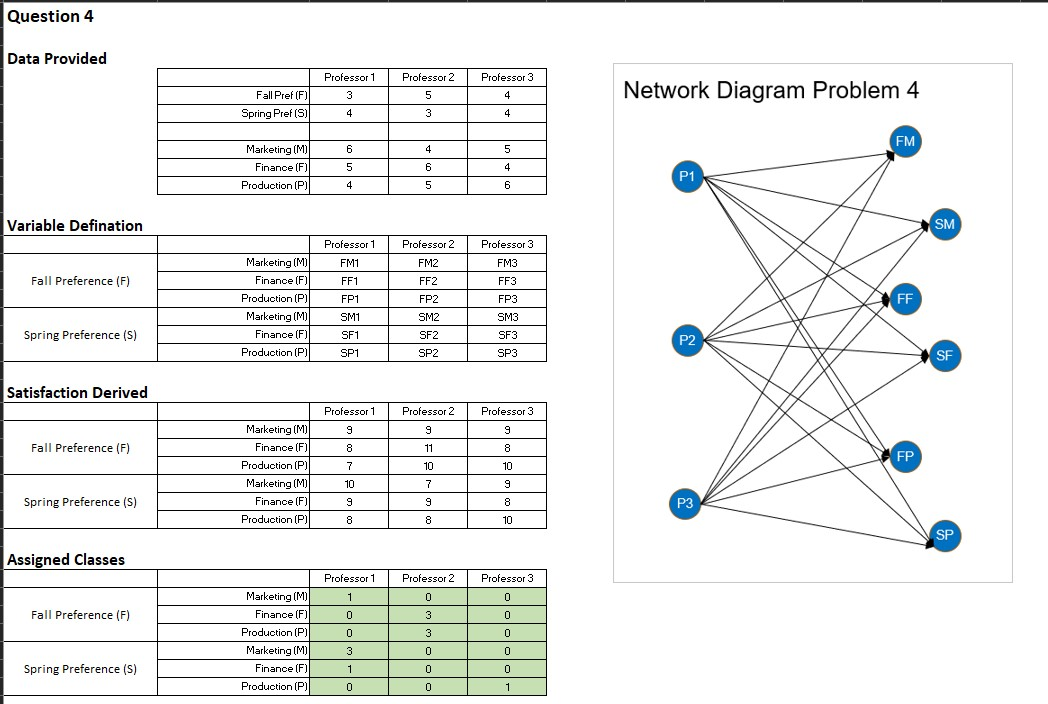

In [ ]:
 # Create a LP Maximization problem
Lp_prob = p.LpProblem('Problem', p.LpMaximize) 
  
# Create problem Variables 
FM1 = p.LpVariable("FM1", lowBound = 0, cat='Integer')  # Fall Marketing Courses Professor 1
FF1 = p.LpVariable("FF1", lowBound = 0, cat='Integer') # Fall Finance Courses Professor 1
FP1 = p.LpVariable("FP1", lowBound = 0, cat='Integer')  # Fall Production Courses Professor 1
SM1 = p.LpVariable("SM1", lowBound = 0, cat='Integer')  # Spring Marketing Courses Professor 1
SF1 = p.LpVariable("SF1", lowBound = 0, cat='Integer')  # Spring Finance Courses Professor 1
SP1 = p.LpVariable("SP1", lowBound = 0, cat='Integer')  # Spring Production Courses Professor 1
FM2 = p.LpVariable("FM2", lowBound = 0, cat='Integer')  # Fall Marketing Courses Professor 2
FF2 = p.LpVariable("FF2", lowBound = 0, cat='Integer') # Fall Finance Courses Professor 2
FP2 = p.LpVariable("FP2", lowBound = 0, cat='Integer')  # Fall Production Courses Professor 2
SM2 = p.LpVariable("SM2", lowBound = 0, cat='Integer')  # Spring Marketing Courses Professor 2
SF2 = p.LpVariable("SF2", lowBound = 0, cat='Integer')  # Spring Finance Courses Professor 2
SP2 = p.LpVariable("SP2", lowBound = 0, cat='Integer')  # Spring Production Courses Professor 2
FM3 = p.LpVariable("FM3", lowBound = 0, cat='Integer')  # Fall Marketing Courses Professor 3
FF3 = p.LpVariable("FF3", lowBound = 0, cat='Integer') # Fall Finance Courses Professor 3
FP3 = p.LpVariable("FP3", lowBound = 0, cat='Integer')  # Fall Production Courses Professor 3
SM3 = p.LpVariable("SM3", lowBound = 0, cat='Integer')  # Spring Marketing Courses Professor 3
SF3 = p.LpVariable("SF3", lowBound = 0, cat='Integer')  # Spring Finance Courses Professor 3
SP3 = p.LpVariable("SP3", lowBound = 0, cat='Integer')  # Spring Production Courses Professor 3



  
# Objective Function
Lp_prob += (9*FM1) + (8*FF1) + (7*FP1) + (10*SM1) + (9*SF1) + (8*SP1) + (9*FM2) + (11*FF2) + (10*FP2) + (7*SM2) + (9*SF2) + (8*SP2) + (9*FM3) + (8*FF3) + (10*FP3) + (9*SM3) + (8*SF3) + (10*SP3)

# Constraints:
Lp_prob += FM1+FM2+FM3>=1         # At least one section of fall marketing                                                       
Lp_prob += FF1+FF2+FF3>=1         # At least one section of fall finance 
Lp_prob += FP1+FP2+FP3>=1         # At least one section of fall production 
Lp_prob += SM1+SM2+SM3>=1         # At least one section of spring production
Lp_prob += SF1+SF2+SF3>=1         # At least one section of spring finance 
Lp_prob += SP1+SP2+SP3>=1         # At least one section of spring production
Lp_prob += FM1+FM2+FM3+SM1+SM2+SM3 == 4         # Four sections of marketing must be offered
Lp_prob += FF1+FF2+FF3+SF1+SF2+SF3 == 4         # Four sections of finance must be offered
Lp_prob += FP1+FP2+FP3+SP1+SP2+SP3 == 4         # Four sections of production must be offered
  
# Display the problem
print(Lp_prob)

# Display the problem
print(Lp_prob)

Problem:
MAXIMIZE
8*FF1 + 11*FF2 + 8*FF3 + 9*FM1 + 9*FM2 + 9*FM3 + 7*FP1 + 10*FP2 + 10*FP3 + 9*SF1 + 9*SF2 + 8*SF3 + 10*SM1 + 7*SM2 + 9*SM3 + 8*SP1 + 8*SP2 + 10*SP3 + 0
SUBJECT TO
_C1: FM1 + FM2 + FM3 >= 1

_C2: FF1 + FF2 + FF3 >= 1

_C3: FP1 + FP2 + FP3 >= 1

_C4: SM1 + SM2 + SM3 >= 1

_C5: SF1 + SF2 + SF3 >= 1

_C6: SP1 + SP2 + SP3 >= 1

_C7: FM1 + FM2 + FM3 + SM1 + SM2 + SM3 = 4

_C8: FF1 + FF2 + FF3 + SF1 + SF2 + SF3 = 4

_C9: FP1 + FP2 + FP3 + SP1 + SP2 + SP3 = 4

VARIABLES
0 <= FF1 Integer
0 <= FF2 Integer
0 <= FF3 Integer
0 <= FM1 Integer
0 <= FM2 Integer
0 <= FM3 Integer
0 <= FP1 Integer
0 <= FP2 Integer
0 <= FP3 Integer
0 <= SF1 Integer
0 <= SF2 Integer
0 <= SF3 Integer
0 <= SM1 Integer
0 <= SM2 Integer
0 <= SM3 Integer
0 <= SP1 Integer
0 <= SP2 Integer
0 <= SP3 Integer

Problem:
MAXIMIZE
8*FF1 + 11*FF2 + 8*FF3 + 9*FM1 + 9*FM2 + 9*FM3 + 7*FP1 + 10*FP2 + 10*FP3 + 9*SF1 + 9*SF2 + 8*SF3 + 10*SM1 + 7*SM2 + 9*SM3 + 8*SP1 + 8*SP2 + 10*SP3 + 0
SUBJECT TO
_C1: FM1 + FM2 + FM3 >= 1

_C

## 3. Solve Problem and print outputs

In [ ]:
# Solve the problem
status = Lp_prob.solve()
print(f"Problem 3")
print(f"status={p.LpStatus[status]}")

# Print the results
for variable in Lp_prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {p.value(Lp_prob.objective)}")
print(f"")

Problem 3
status=Optimal
FF1 = 0.0
FF2 = 3.0
FF3 = 0.0
FM1 = 0.0
FM2 = 0.0
FM3 = 1.0
FP1 = 0.0
FP2 = 3.0
FP3 = 0.0
SF1 = 1.0
SF2 = 0.0
SF3 = 0.0
SM1 = 3.0
SM2 = 0.0
SM3 = 0.0
SP1 = 0.0
SP2 = 0.0
SP3 = 1.0
Objective = 121.0



In [ ]:
SenAnalysis = [{'name': name, 'Shadow Price': c.pi, 'Slack':c.slack} for name, c in Lp_prob.constraints.items()]
print (pd.DataFrame(SenAnalysis))

  name  Shadow Price  Slack
0  _C1          -0.0   -0.0
1  _C2          -0.0   -2.0
2  _C3          -0.0   -2.0
3  _C4          -0.0   -2.0
4  _C5          -0.0   -0.0
5  _C6          -0.0   -0.0
6  _C7          -0.0   -0.0
7  _C8          -0.0   -0.0
8  _C9          -0.0   -0.0


#### Generate Sensitivity files. This only works with Jupyter notebook, not google colab

In [ ]:
# Output Results and Sensitivity
Lp_prob.writeLP("Ass2Q3.lp")
Lp_prob.solve(GLPK(options=['--ranges Ass2Q3.sen']))
print ("Status:", LpStatus[Lp_prob.status])

for v in Lp_prob.variables():
    print(v.name, "=", v.varValue)

print ("Objective", value(Lp_prob.objective))
print ("")